In [1]:
import os

In [2]:
import pandas as pd

In [3]:
df = pd.read_json(os.path.join("data", "filmy.json"))

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
", ".join(df.columns.to_list())

'Film, Země původu, Copyright, Rok výroby, Premiéra, Minutáž, Režie, Kategorie, Žánr, Typologie, Originální název, Český název, Anglický název, Souběžný název, Pracovní název, Hrají, Postavy, Pomocná režie, Asistent režie, Původní filmový námět, Scénář, Dramaturg, Kamera, Asistent kamery, Architekt, Návrhy kostýmů, Masky, Střih, Zvuk, Producent, Vedoucí výroby, Zástupce vedoucího výroby, Odborný poradce, Hudba, Choreografie, Lokace, Distribuční slogan, Výrobce, S podporou, Nositelé copyrightu, Distribuce, Délka, Distribuční nosič, Poměr stran, Barva, Zvukový systém/formát, Verze, Mluveno, Podtitulky, Úvodní/závěrečné titulky, Anotace, Obsah, Technický scénář, Výtvarník, Animace, Triky, Postprodukce, Návrhy titulků, Pedagogické vedení, Použitá hudba, Studentský film, Původní metráž, Mezititulky, Ocenění, Poznámka, Mluví, Vizuální efekty, Vedoucí produkce, Předloha, Kaskadéři, Text písně, Zpívá, pásmo, Části, Produkce, Výtvarná spolupráce, Nahrál, Partner, Animační technika, Výprava, Spo

In [6]:
len(df.columns.to_list())

131

## Nutno zjistit, co všechno je v databázi: emigranti? zahraniční produkce? 

(Byly tam Formanovy exilové filmy – už šly pryč při čištění.)

In [84]:
df[df["Režie"].str.lower().str.contains("forman", na=False)].groupby("Film")["Copyright"].first().sort_values()

Film
Kdyby ty muziky nebyly (400440)     1963
Konkurs (400441)                    1963
Černý Petr (396557)                 1963
Lásky jedné plavovlásky (396651)    1965
Hoří, má panenko (396750)           1967
Goyovy přízraky (54226)             2006
Martin (402016)                     2016
Name: Copyright, dtype: int64

In [85]:
df.explode("Země původu").groupby("Země původu")["Film"].nunique().nlargest(20)

Země původu
Československo                              3039
Česká republika                             1364
Slovensko                                    261
Rakousko-Uhersko                             107
Francie                                       79
Spolková republika Německo                    60
Polsko                                        55
Rakousko                                      39
Německá spolková republika                    25
Velká Británie                                25
Německo                                       22
Spojené státy americké                        20
Svaz sovětských socialistických republik      19
Maďarsko                                      17
Bulharsko                                     14
Itálie                                        14
Německá demokratická republika                13
Slovinsko                                     13
Dánsko                                        11
Rumunsko                                      10
Name: Fi

In [87]:
df_typ = df.explode("Typologie")
df_typ[df_typ["Typologie"] == "zahraniční"]["Film"].drop_duplicates().to_list()

['Krise (401664)', 'Oratorium pro Prahu (401721)', 'Goyovy přízraky (54226)']

In [88]:
df[df["Režie"].str.lower().str.contains("ivan passer", na=False)].groupby("Film")["Copyright"].first().sort_values()

Film
Fádní odpoledne (396619)      1964
Intimní osvětlení (396652)    1965
Name: Copyright, dtype: int64

## Basic technické věci

<AxesSubplot:xlabel='Copyright'>

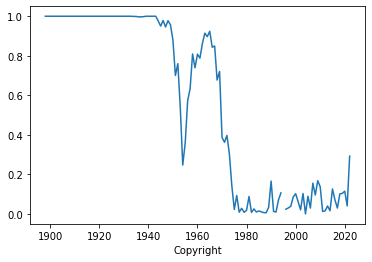

In [89]:
((df[df["Barva"] != "barevný"].groupby("Copyright")["Minutáž"].sum()) / (df.groupby("Copyright")["Minutáž"].sum())).plot()

"Československý film slaví výročí. Před sedmdesáti lety — 28. března 1947 — měl premiéru první československý barevný hraný snímek Jan Roháč z Dubé od režiséra Vladimíra Borského. Než se stal barevný film běžnou záležitostí, to však ještě chvíli trvalo, i proto, že materiál byl velmi drahý. Proto se pečlivě vybírala témata pro natáčení v barvě i režiséři, kteří dostali tuto šanci."

<AxesSubplot:xlabel='Copyright'>

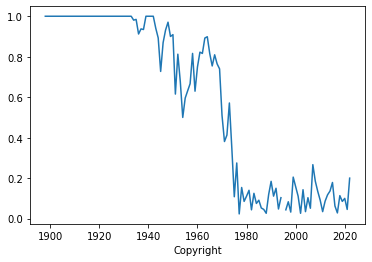

In [90]:
((df[df["Barva"] != "barevný"].groupby("Copyright")["Film"].nunique()) / (df.groupby("Copyright")["Film"].nunique())).plot()

<AxesSubplot:xlabel='Copyright'>

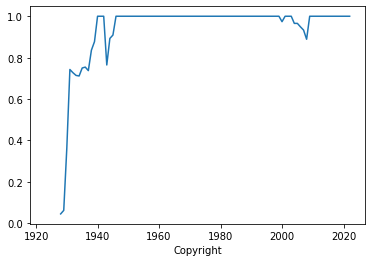

In [91]:
((df[~df["Zvukový systém/formát"].isnull()].groupby("Copyright")["Film"].nunique()) / (df.groupby("Copyright")["Film"].nunique())).plot()

<AxesSubplot:xlabel='Copyright', ylabel='Minutáž'>

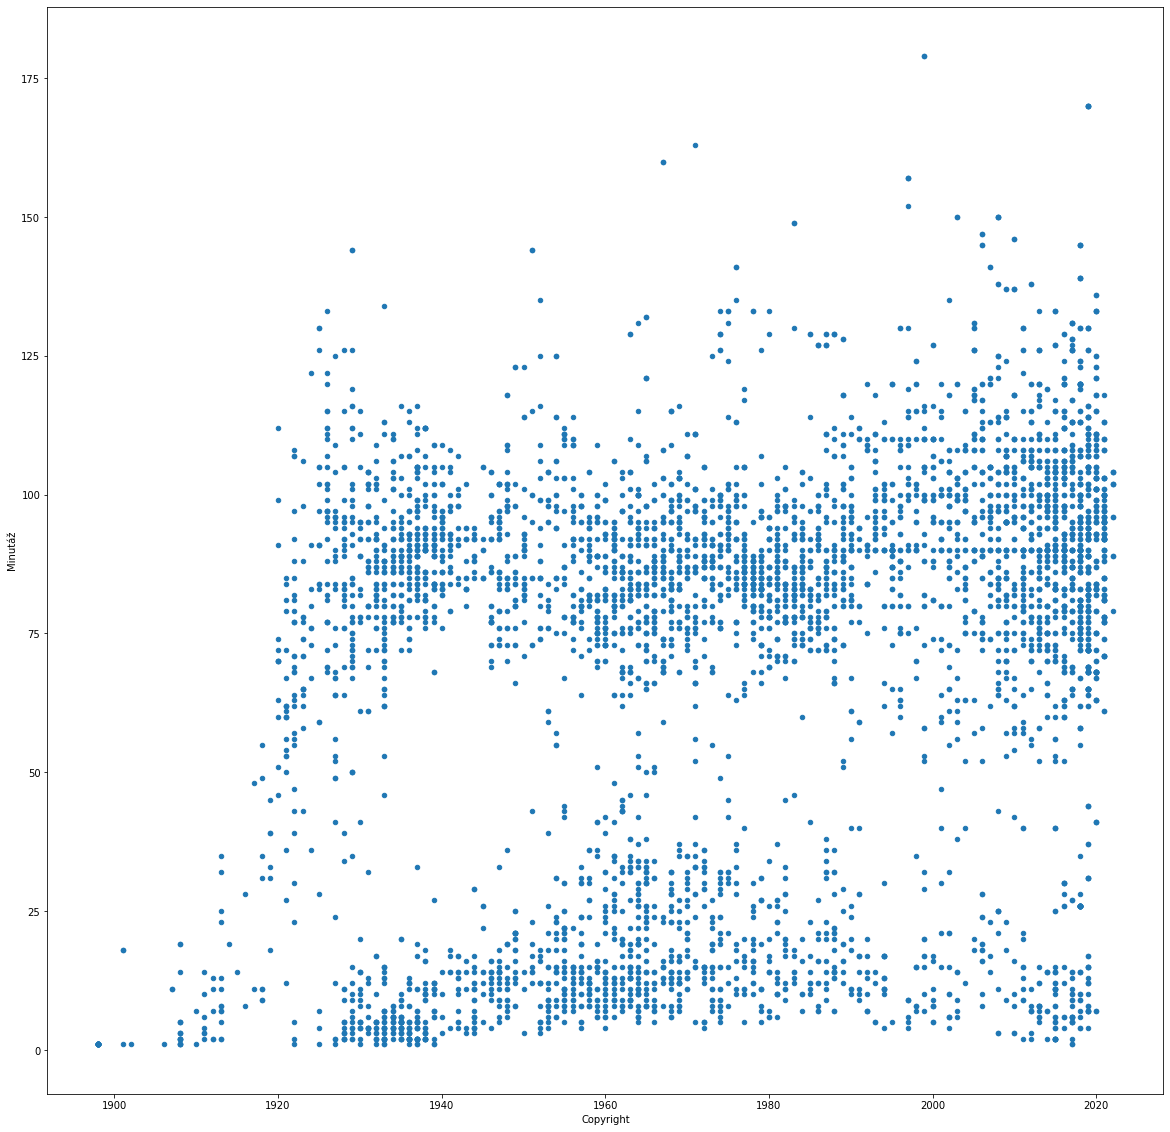

In [92]:
df[df["Minutáž"] < 180].plot.scatter(x="Copyright",y="Minutáž", figsize=(20,20))

## Nejdelší filmy so far

In [15]:
chybna_minutaz = ["Hrdina divokého západu (402185)","Místo v houfu (396595)","Venoušek a Stázička (395308)","Zapomenuté transporty (79193)"]
nejdelsi = df[~df.Minutáž.isnull()]
nejdelsi = nejdelsi[nejdelsi["Copyright"] > 1933]
nejdelsi = nejdelsi[~nejdelsi.Film.isin(chybna_minutaz)]
nejdelsi = nejdelsi.sort_values('Rok výroby')
nejdelsi['max_length_so_far'] = nejdelsi['Minutáž'].expanding().max().shift()
nejdelsi = nejdelsi[nejdelsi['Minutáž'] > nejdelsi['max_length_so_far']]
nejdelsi[["Film","Režie","Copyright","Minutáž"]]

,Film,Režie,Copyright,Minutáž
648,Anita v ráji (395659),Jan Sviták (37466),1934,77.0
650,Volha v plamenech (395662),Viktor Turžanskij (56215),1934,84.0
739,...a život jde dál... (395701),"[Carl Junghans (35784), F. W. Kraemer (35785),...",1935,86.0
640,Zlatá Kateřina (395651),Vladimír Slavínský (31967),1934,104.0
644,Hej-Rup! (395655),Martin Frič (20324),1934,110.0
654,Matka Kráčmerka (395657),Vladimír Slavínský (31967),1934,111.0
722,Jedna z milionu (395693),Vladimír Slavínský (31967),1935,116.0
1249,Němá barikáda (396096),Otakar Vávra (9507),1948,118.0
1275,Revoluční rok 1848 (396094),Václav Krška (20325),1949,123.0
1308,Císařův pekař – Pekařův císař (396131),Martin Frič (20324),1951,144.0


In [93]:
df.groupby("Film")["Původní metráž"].max().nlargest(20)

Film
Venoušek a Stázička (395308)              6350.0
Dny zrady (396979)                        5881.0
Marketa Lazarová (396753)                 5422.0
Kronika žhavého léta (397000)             4806.0
Kinoautomat Člověk a jeho dům (396715)    4717.0
Babička I., II. (396899)                  4637.0
Císařův pekař – Pekařův císař (396131)    4400.0
Nejasná zpráva o konci světa (9463)       4330.0
Putování Jana Amose (397429)              4246.0
Plukovník Švec (395482)                   4110.0
Osvobození Prahy (397108)                 4010.0
Bouřlivé víno (397122)                    3910.0
Anna proletářka (396154)                  3845.0
Temné slunce (397277)                     3828.0
Prodaná nevěsta (395602)                  3823.0
Pohádka máje (395380)                     3818.0
Kentauři (397170)                         3807.0
Román hloupého Honzy (395387)             3790.0
Sarajevský atentát (397073)               3770.0
Ať žije republika (396660)                3754.0
Name: Původní m

## Detaily

In [94]:
with open("seznamove_sloupce.txt", "r", encoding = "utf-8") as s_sloupce:
    s_sloupce = s_sloupce.readlines()
    seznamove_sloupce = [s.strip() for s in s_sloupce]

In [95]:
seznamove_sloupce

['Animace',
 'Animační technika',
 'Architekt',
 'Asistent kamery',
 'Asistent režie',
 'Ateliéry',
 'Autor komentáře',
 'Barva',
 'Distribuční nosič',
 'Dramaturg',
 'Druhá kamera',
 'Hudba',
 'Choreografie',
 'Kamera',
 'Kaskadéři',
 'Koordinátor kaskadérů',
 'Koproducent',
 'Masky',
 'Mezititulky',
 'Mluveno',
 'Natáčecí formát',
 'Návrhy kostýmů',
 'Návrhy titulků',
 'Odborný poradce',
 'Pedagogické vedení',
 'Podtitulky',
 'Pomocná režie',
 'Postprodukce',
 'Producent',
 'Produkce',
 'Předloha',
 'Původní filmový námět',
 'Režie',
 'Scénář',
 'Spolupráce',
 'Střih',
 'Technický scénář',
 'Typologie',
 'Úvodní/závěrečné titulky',
 'Vedoucí produkce',
 'Vedoucí výroby',
 'Verze',
 'Výprava',
 'Výkonná produkce',
 'Výtvarná spolupráce',
 'Výtvarník',
 'Zástupce vedoucího produkce',
 'Zástupce vedoucího výroby',
 'Země původu',
 'Zpívá',
 'Zvuk',
 'Zvukový systém/formát',
 'Žánr',
 'Distribuce',
 'Nositelé copyrightu',
 'Partner',
 'S podporou',
 'Triky',
 'Vizuální efekty',
 'Výrobce

## První…

In [19]:
df = df.explode("Žánr")

In [20]:
df[df["Délka"] == "dlouhometrážní"].groupby("Žánr")[["Copyright","Film"]].first().head(50).sort_values(by="Copyright")

,Copyright,Film
Žánr,,
fantastický,1920,Zpěv zlata (395234)
groteska,1920,Hrdina divokého západu (402185)
drama,1920,Legionář (395220)
dobrodružný,1920,Setřelé písmo (395235)
melodrama,1920,Magdalena (395221)
kriminální,1921,Otrávené světlo (395258)
komedie,1921,Irčin románek I. (395245)
legenda,1922,Koryatovič (395286)
pohádka,1922,Zlatý klíček (395309)


In [21]:
df.groupby("Originální název")["Film"].nunique().nlargest(10)

Originální název
Dvojník                4
Kam s ním?             4
Prodaná nevěsta        4
Babička                3
Boží mlýny             3
Dobrý voják Švejk      3
Mořská panna           3
Návraty                3
Perníková chaloupka    3
Pevnost                3
Name: Film, dtype: int64

## Typologie

In [22]:
def popularita(sloupec, filtr, co):
    if co == "n":
        pd.Series(df[df[sloupec] == filtr].groupby("Film")[["Copyright","Film"]].first().groupby("Copyright")["Film"].nunique() / df.groupby("Film")[["Copyright","Film"]].first().groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,3))
    if co == "min":
        pd.Series(df[df[sloupec] == filtr].groupby("Film")[["Copyright","Minutáž"]].first().groupby("Copyright")["Minutáž"].sum() / df.groupby("Film")[["Copyright","Minutáž"]].first().groupby("Copyright")["Minutáž"].sum()).plot.bar(figsize=(20,3))

In [23]:
df["Kategorie"].drop_duplicates().to_list()

['film', 'povídkový film', 'povídka', 'pásmo']

In [24]:
df["Typologie"].drop_duplicates().to_list()

[['dokumentární', 'distribuční'],
 ['hraný', 'distribuční'],
 ['animovaný', 'distribuční'],
 ['zahraniční', 'dokumentární', 'distribuční'],
 ['dokumentární', 'distribuční', 'studentský'],
 ['hraný', 'nedistribuční', 'studentský'],
 ['hraný', 'distribuční', 'studentský'],
 ['dokumentární', 'nedistribuční', 'studentský'],
 ['hraný', 'distribuční', 'středometrážní'],
 ['zahraniční', 'dokumentární', 'nedistribuční'],
 ['dokumentární', 'nedistribuční'],
 ['hraný', 'distribuční', 'krátkometrážní'],
 ['hraný', 'nedistribuční'],
 ['animovaný', 'distribuční', 'studentský'],
 ['hraný', 'animovaný', 'distribuční', 'studentský'],
 ['dokumentární', 'animovaný', 'distribuční'],
 ['zahraniční', 'hraný', 'distribuční'],
 ['hraný', 'dokumentární', 'animovaný', 'distribuční'],
 ['hraný', 'animovaný', 'distribuční'],
 ['animovaný', 'distribuční', 'krátkometrážní'],
 ['hraný', 'dokumentární', 'distribuční', 'studentský'],
 ['dokumentární', 'distribuční', 'krátkometrážní'],
 ['dokumentární', 'animovaný', '

In [25]:
df.groupby("Žánr")["Film"].nunique().nlargest(25)

Žánr
komedie          979
drama            644
psychologický    412
povídka          231
příběh           229
reklamní         223
pohádka          216
dětský           188
historický       182
melodrama        164
dokument         134
kriminální       121
životopisný      112
hudební          111
etuda            110
satira            94
dobrodružný       91
politický         81
hořká komedie     78
groteska          77
povídkový         76
osvětový          71
reportáž          69
rodinný           69
sociální          68
Name: Film, dtype: int64

In [26]:
", ".join(df["Žánr"].drop_duplicates().to_list())

'reportáž, sportovní, fraška, anekdota, komedie, propagační, fantastický, trikový, western, drama, poetický, alegorie, kriminální, etuda, taneční, /neidentifikován/, opera, melodrama, společenský, tragikomedie, detektivní, historický, dobrodružný, legenda, osvětový, groteska, pohádka, sociální, balada, reklamní, povídkový, životopisný, ilustrace písně, psychologický, špionážní, populárně-vědecký, válečný, avantgardní, abstraktní, hudební, satira, střihový, dokument, ilustrace skladby, cestopisný, opereta, lyrický, bláznivá komedie, časosběrný, fejeton, podobenství, politický, experimentální, dětský, protiválečný, instrukční, romantický, báseň, umělecký, rodinný, agitka, povídka, noir, výukový, parodie, příběh, bajka, budovatelský, báje, medailon, záznam divadelní inscenace, biblický, moralita, sci-fi, absurdní, esej, muzikál, přírodopisný, anketa, katastrofický, hořká komedie, smutná komedie, revue, thriller, horor, pantomima, milostný, černá komedie, balet, erotický, tragédie, férie, 

<AxesSubplot:xlabel='Copyright'>

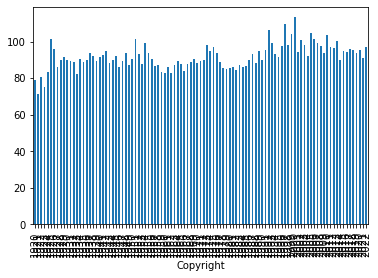

In [27]:
df[(df["Délka"] == "dlouhometrážní") & (df["Minutáž"] < 400)].groupby("Copyright")["Minutáž"].mean().plot.bar()

<AxesSubplot:xlabel='Copyright'>

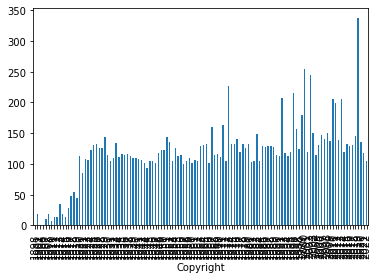

In [28]:
df[df["Minutáž"] < 400].groupby("Copyright")["Minutáž"].max().plot.bar()

<AxesSubplot:xlabel='Copyright'>

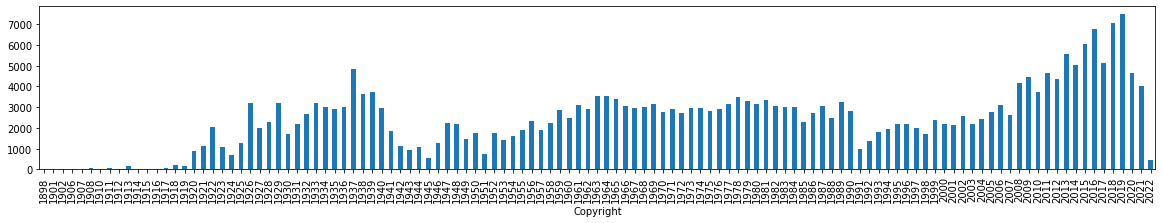

In [29]:
df.groupby("Film")[["Copyright","Minutáž"]].first().groupby("Copyright")["Minutáž"].sum().plot.bar(figsize=(20,3))

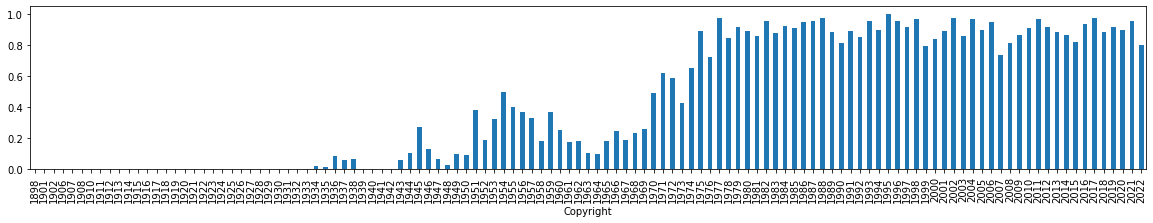

In [30]:
popularita("Barva","barevný","n")

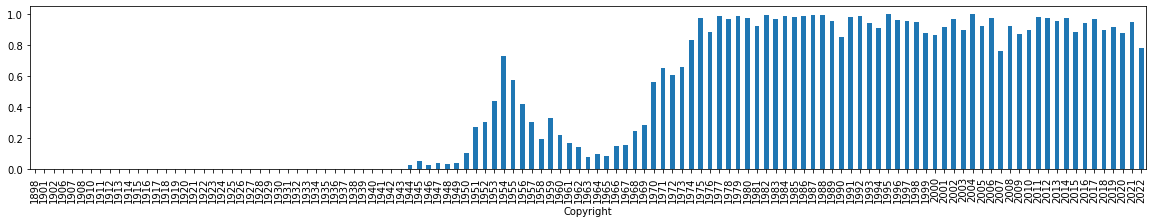

In [31]:
popularita("Barva","barevný","min")

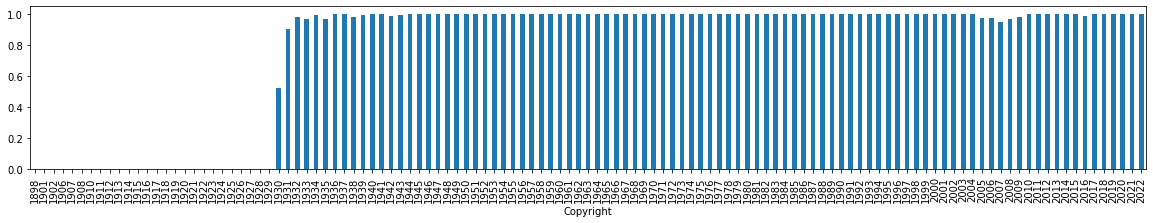

In [32]:
popularita("Zvuk","zvukový","min")

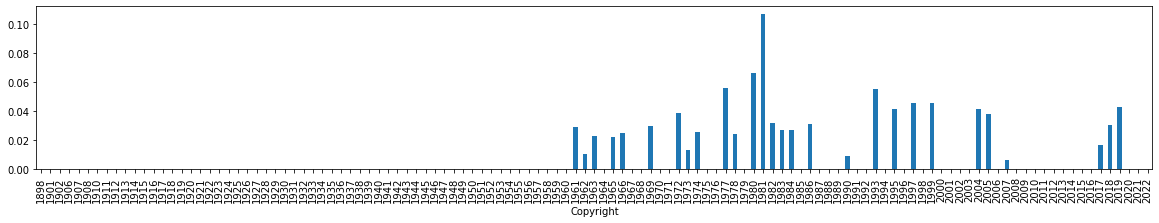

In [33]:
popularita("Žánr","sci-fi","min")

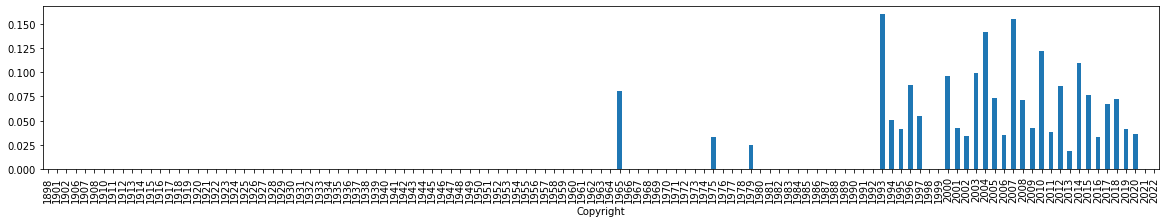

In [34]:
popularita("Žánr","hořká komedie","min")

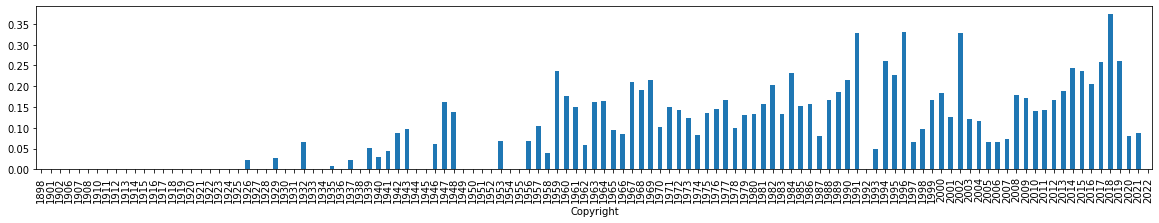

In [35]:
popularita("Žánr","psychologický","min")

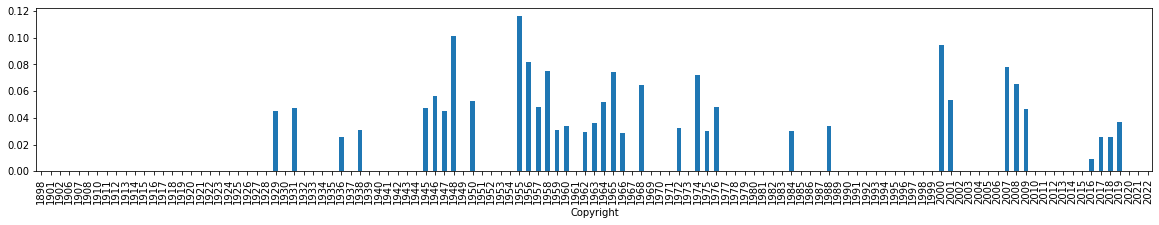

In [36]:
popularita("Žánr","válečný","min")

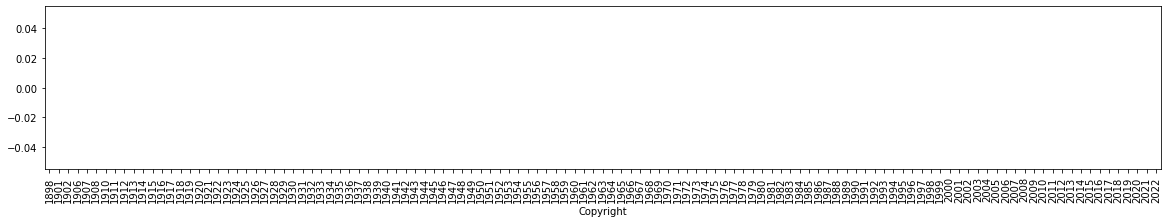

In [83]:
popularita("Typologie","dokumentární","min")

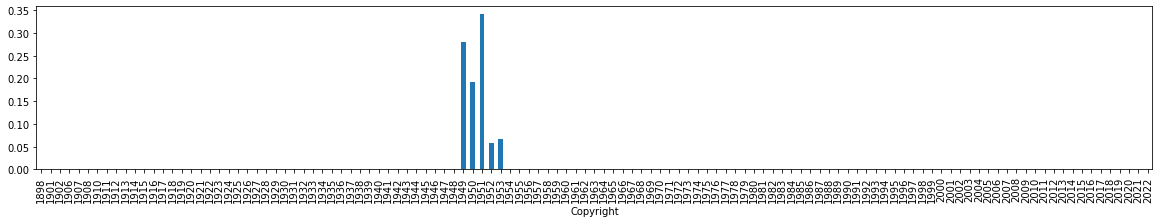

In [38]:
popularita("Žánr","budovatelský","min")

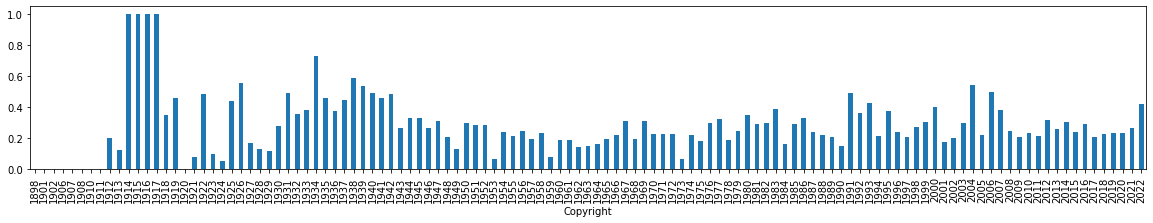

In [39]:
popularita("Žánr","komedie","min")

<AxesSubplot:xlabel='Copyright'>

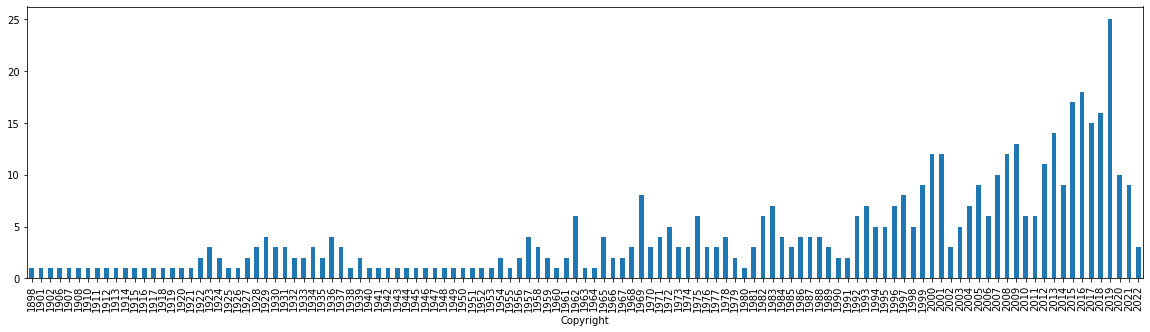

In [40]:
df.explode("Země původu").groupby("Copyright")["Země původu"].nunique().plot.bar(figsize=(20,5))

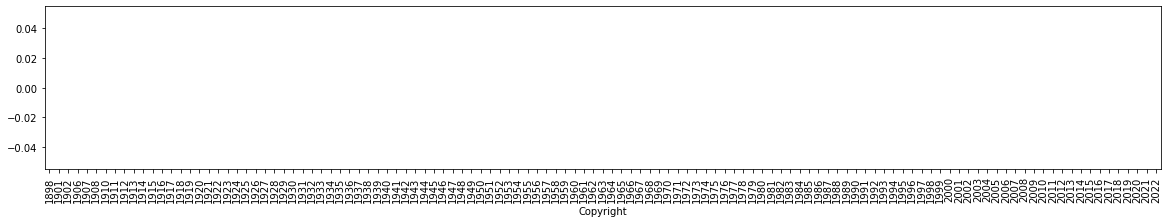

In [41]:
popularita("Země původu","Svaz sovětských socialistických republik","min")

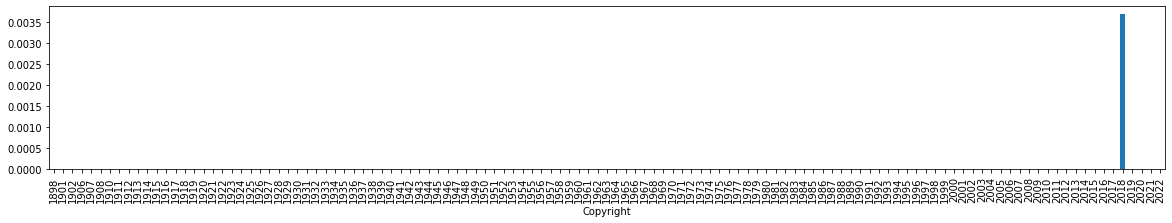

In [42]:
popularita("Země původu","Polsko","min")

<AxesSubplot:xlabel='Copyright'>

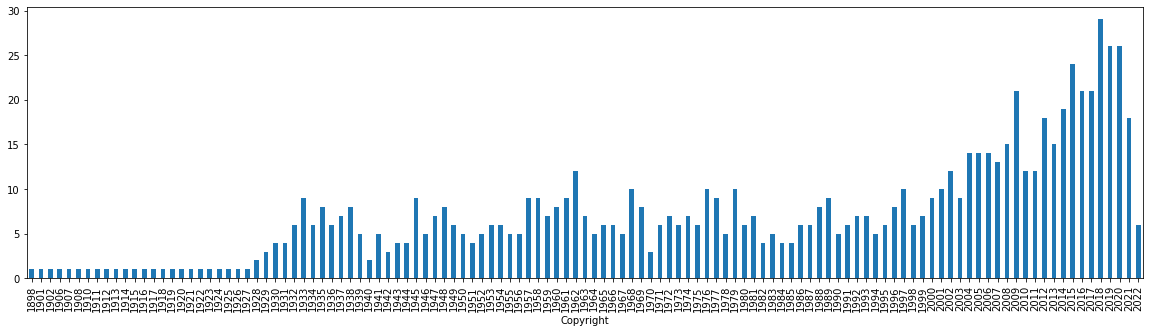

In [43]:
df.explode("Mluveno").groupby("Copyright")["Mluveno"].nunique().plot.bar(figsize=(20,5))

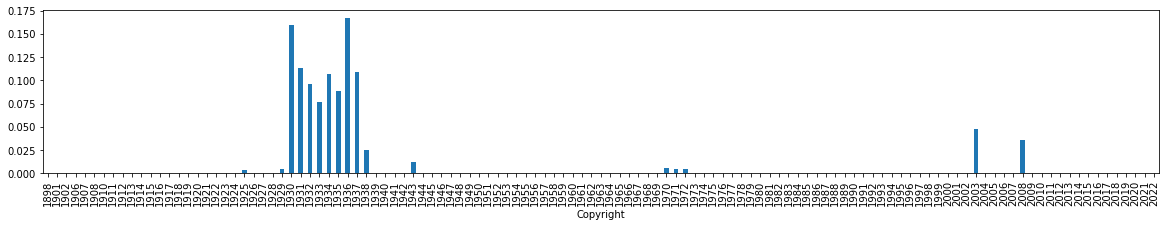

In [81]:
popularita("Úvodní/závěrečné titulky","německé","min")

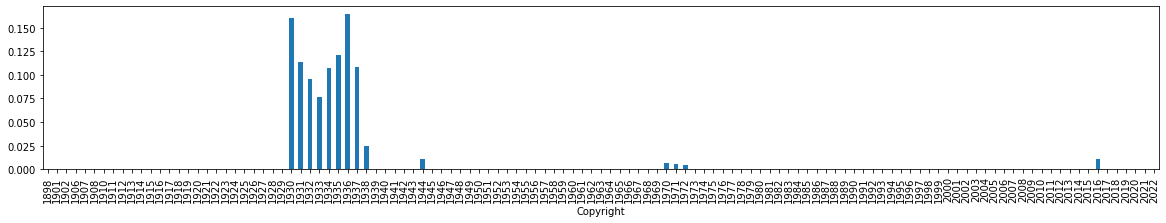

In [44]:
popularita("Mluveno","německy","min")

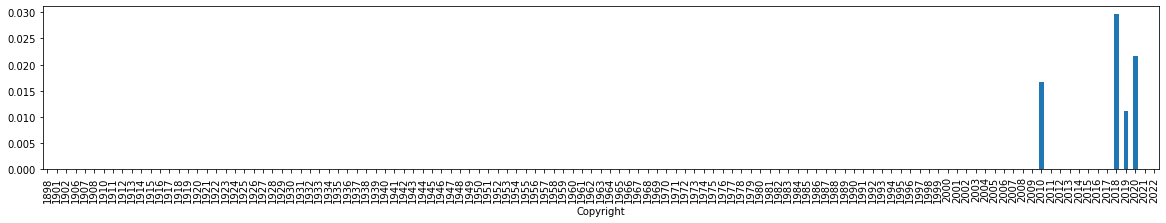

In [45]:
popularita("Mluveno","rusky","min")

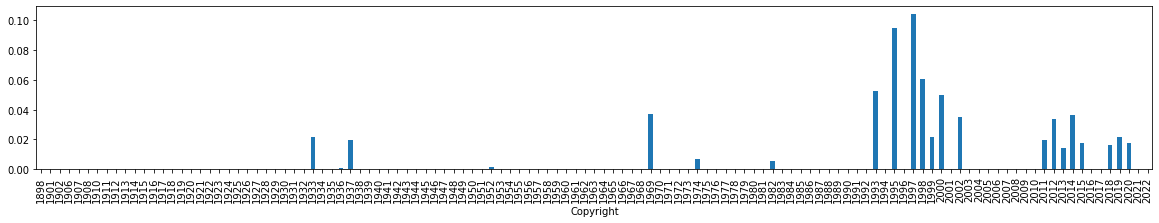

In [46]:
popularita("Mluveno","slovensky","min")

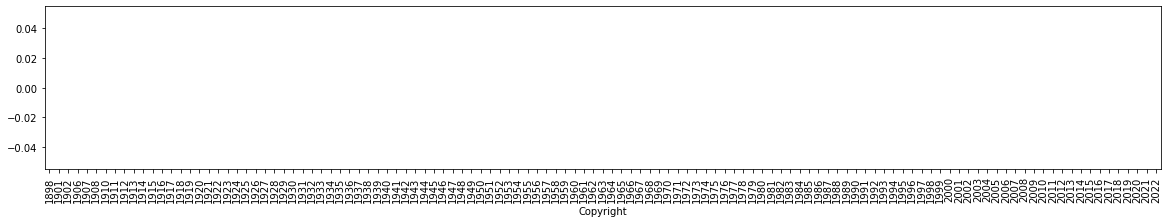

In [47]:
popularita("Mluveno","romsky","min")

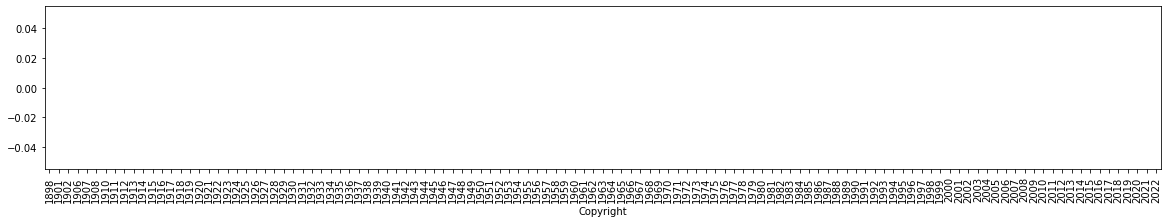

In [48]:
popularita("Mluveno","vietnamsky","min")

## Etc

In [49]:
df.explode("Typologie")["Typologie"].unique()

array(['dokumentární', 'distribuční', 'hraný', 'animovaný', 'zahraniční',
       'studentský', 'nedistribuční', 'středometrážní', 'krátkometrážní'],
      dtype=object)

In [50]:
df.explode("Distribuční nosič").groupby("Distribuční nosič")["Copyright"].min().nsmallest(100)

Distribuční nosič
35mm          1898
DCP 2-D       1898
BRD           1926
DVD           1926
16mm          1933
MP4           1954
70mm          1973
MOV           1996
Super 16mm    1996
DCP 3-D       2008
Name: Copyright, dtype: int64

In [51]:
df.explode("Barva").groupby("Barva")["Copyright"].min().nsmallest(100)

Barva
černobílý     1898
virážovaný    1912
kolorovaný    1913
tónovaný      1923
barevný       1933
Name: Copyright, dtype: int64

In [52]:
df.explode("Zvukový systém/formát").groupby("Zvukový systém/formát")["Copyright"].min().nsmallest(100)

Zvukový systém/formát
Union-Vox                     1923
Bulánek-Nečásek               1928
Union Electric                1929
Tobis – Klang                 1930
Radio-Cinéma Paříž            1930
RCA Photophone                1930
Philipsonor                   1934
Visatone                      1937
mono                          1945
stereo                        1958
Dolby Stereo                  1989
Dolby Digital                 1994
5.1                           1994
Dolby Spectral Recording      1994
digitální zvuk                1998
Dolby Digital Surround EX     2000
Sony Dynamic Digital Sound    2000
Dolby                         2000
Digital Theater System        2000
2.0                           2003
Dolby E 5.0                   2014
7.1                           2016
Dolby Atmos                   2018
Name: Copyright, dtype: int64

In [53]:
df[df["Distribuční nosič"] == "35mm"].groupby("Originální název").first()

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Hudba k písni,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,Zpěv role,povídkový film,Povídky,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Překlad české verze,Rychlost,Přístupnost,Začátek výroby,Konec výroby
Originální název,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"...A bílá bledla, až celkem ztmavla","...A bílá bledla, až celkem ztmavla (397394)",Československo,1983,1983,None,46.0,Jan Prokop (54106),film,příběh,"[hraný, nedistribuční, studentský]","...A bílá bledla, až celkem ztmavla",When White Faded to Black,None,None,"[Růžena Rudnická (126527), Jiří Schwarz (1346)...","[herečka Zdena Svobodová, student Petr, Zdenin...",None,None,Jan Prokop (54106),"[Jan Prokop (54106), Irena Šlapáková (69768)]",None,Jiří Kovář (6735),None,Oldřich Bosák (4942),None,None,Maroš Černák (5229),zvukový,None,"[Dáša Horevajová (12352), Václav Hrdina (128097)]",None,None,[Petr Skoumal (1249)],None,[],None,Studio FAMU,None,None,None,středometrážní,35mm,1.37,černobílý,mono,česká,česky,bez titulků,české,None,Mladá herečka Zdena přijede do Prahy za svým p...,None,None,None,None,None,None,"[Jaroslav Balík (4940), Alois Fišárek (570), J...",None,,1288.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Ivo Bláha (569), Jozef Bódi (128110), Martin ...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1983,1983
...a odpusť jim jejich viny,...a odpusť jim jejich viny (397708),Československo,1992,1992,None,13.0,Jaromír Polišenský (4761),film,drama,"[hraný, distribuční, studentský]",...a odpusť jim jejich viny,Shaleath Forgive Them Their Sins,None,None,"[Petr Čepek (4764), Jiří Kodeš (2787), Karel P...","[inženýr Drakl, ředitel chemické továrny, lupi...",None,None,None,Jan Drbohlav (2809),None,Martin Čech (6316),None,Radmila Iblová (129574),None,Alena Marečková (20168),Jan Daňhel (932),zvukový,None,Jana Mašíková (1745),None,None,[],None,[],None,Studio FAMU,None,Studio FAMU,Studio FAMU,krátkometrážní,35mm,1.37,barevný,mono,česká,česky,bez titulků,české,"Příběh muže, který šel cestou svého svědomí.",Inženýr Drakl se před svou vilou loučí s manže...,None,None,None,None,None,None,"[Jaromil Jireš (5317), Karel Smyczek (611), Ja...",None,,390.0,None,[Vítěz Festival: 4. festival FAMU Praha 1994 P...,None,None,None,None,J

In [54]:
df.explode("Režie").groupby("Režie")["Žánr"].nunique().nlargest()

Režie
Martin Frič (20324)      26
Otakar Vávra (9507)      25
Věra Chytilová (1555)    23
Evald Schorm (7895)      22
Karel Kachyňa (3526)     19
Name: Žánr, dtype: int64

In [55]:
pisne = df.explode("Písně")[["Copyright","Originální název","Písně","Žánr"]]

In [56]:
pisne.groupby("Písně")["Originální název"].nunique().nlargest(10)

Písně
Kde domov můj                    32
Škoda lásky                      28
Zelení hájové                    22
Internacionála                   19
Život je jen náhoda              19
Ktož jsú boží bojovníci          18
Už mou milou do kostela vedou    17
Šly panenky silnicí              16
Kolíne, Kolíne                   15
Kupředu, zpátky ni krok          15
Name: Originální název, dtype: int64

In [57]:
df["Zvuk"].drop_duplicates().to_list()

['němý',
 ['němý', 'zvukový'],
 'zvukový',
 'Josef Zora (127308)',
 None,
 'Ivo Špalj (694)',
 ['Igor Vrabec (7615)', 'František Krähenbiel (27581)'],
 ['Michal Deliopulos (20926)', 'Richard Müller (9113)'],
 'Ladislav Procházka (109365)',
 ['Peter Mojžiš (6537)', 'Jan Štindl (15038)'],
 ['Petr Forejt (11779)', 'Ivan Horák (2298)', 'Peter Németh (67206)'],
 ['Viktor Ekrt (1248)', 'Pavel Rejholec (5364)', 'Rafał Paczkowski (42877)']]

In [58]:
df["Zvukový systém/formát"].drop_duplicates().to_list()

[None,
 'Union-Vox',
 'Bulánek-Nečásek',
 'Union Electric',
 'Tobis – Klang',
 'RCA Photophone',
 'Radio-Cinéma Paříž',
 'Philipsonor',
 'Visatone',
 ['Tobis – Klang', 'Visatone'],
 'mono',
 ['mono', 'stereo'],
 'stereo',
 'Dolby Stereo',
 'Dolby Spectral Recording',
 ['Dolby Stereo', '5.1', 'Dolby Digital'],
 'Dolby Digital',
 ['mono', 'digitální zvuk'],
 ['Dolby Stereo', 'mono'],
 'Dolby Digital Surround EX',
 'Dolby',
 ['Dolby Stereo', 'Digital Theater System', 'Sony Dynamic Digital Sound'],
 ['Dolby Digital', 'Digital Theater System', 'Sony Dynamic Digital Sound'],
 ['Dolby Stereo', 'Dolby Spectral Recording'],
 ['Dolby Stereo', 'digitální zvuk'],
 ['stereo', '2.0', 'digitální zvuk'],
 ['digitální zvuk', 'Dolby Spectral Recording'],
 ['Dolby Digital', 'digitální zvuk'],
 ['stereo', '5.1', 'digitální zvuk'],
 'digitální zvuk',
 ['Dolby Digital', 'Digital Theater System'],
 ['5.1', 'digitální zvuk'],
 ['Dolby Digital', 'Dolby Spectral Recording'],
 ['5.1', 'Dolby Digital', 'digitální

In [59]:
df = df.sort_values("Copyright")

In [60]:
df.explode("Barva").groupby("Barva").first()[["Premiéra","Originální název"]]

,Premiéra,Originální název
Barva,,
barevný,premiéra 06/1933 /přístupný mládeži/,Drž je! [slovenská verze]
kolorovaný,"premiéra 16. 1. 1914 (kino Illusion, Praha)",Cholera v Praze
tónovaný,"předpremiéra 14. 10. 1923 (kino Lucerna, Prah...",Buď připraven!
virážovaný,"premiéra 28. 11. 1913 (kino Minuta /1 týden/,...",Čtyři roční doby
černobílý,premiéra 19. 6. 1898 (Výstava architektury a ...,Polední výstřel na Mariánských hradbách


In [61]:
df.groupby("Žánr").first()[["Premiéra","Originální název"]]

,Premiéra,Originální název
Žánr,,
/neidentifikován/,premiéra 13. 9. 1918,Idyla ze staré Prahy
abstraktní,premiéra 13. 2. 1931 /přístupný mládeži/ (kino...,Světlo proniká tmou
absurdní,předpremiéra 9. 4. 1964 ...,Postava k podpírání
agitka,premiéra 10/1944 /přístupný mládeži/,Malé hodnoty
akční,slavnostní premiéra 27. 1. 1993 ...,Nahota na prodej
...,...,...
záznam divadelní inscenace,premiéra 16. 7. 1954 /přístupný mládeži/ (kino...,O Alence a káčeti
časosběrný,premiéra 27. 10. 1933 /přístupný mládeži/ (kin...,Zem spieva
černá komedie,premiéra 1. 7. 1984 /přístupný mládeži/,„Babičky dobíjejte přesně!“


In [62]:
df[df["Zvukový systém/formát"] == "stereo"].groupby(["Copyright"]).first()[["Premiéra","Originální název"]]

,Premiéra,Originální název
Copyright,,
1962,premiéra 22. 3. 1963 /přístupný mládeži/ (kino...,Rusalka
1963,premiéra 20. 9. 1963 /přístupný mládeži/ (kina...,Až přijde kocour
1964,předpremiéra 14. 8. 1964 (Ústí nad Labem) ...,Starci na chmelu
1967,zahraniční premiéra 22. 4. 1967 (Českoslovens...,Kinoautomat Člověk a jeho dům
2001,slavnostní premiéra 16. 5. 2003 (Francouzský ...,ELFilm
2015,"předpremiéra 23. 1. 2016 (kino Bio Oko, Praha...",První sníh
2016,premiéra 19. 1. 2017 /přístupné bez omezení/ (...,Krkonoše
2017,nedistribuční premiéra 29. 10. 2017 (kino Pon...,Otesánek
2018,distribuční premiéra 21. 8. 2018 /přístupné be...,Poslední mise Generála Jermakova


In [64]:
df.explode("Mluveno").groupby("Mluveno")["Originální název"].nunique().nlargest(50)

Mluveno
česky                              3518
bez dialogů                         703
německy                             346
slovensky                           301
anglicky                            282
komentář                            160
rusky                               117
francouzsky                         100
polsky                               62
maďarsky                             32
italsky                              30
španělsky                            25
romsky                               22
zpíváno                              16
latinsky                             15
ukrajinsky                           15
japonsky                             11
čínsky                               10
rumunsky                              9
vietnamsky                            9
arabsky                               8
dánsky                                8
hebrejsky                             8
srbochorvatsky                        7
nizozemsky                      

<AxesSubplot:xlabel='Copyright'>

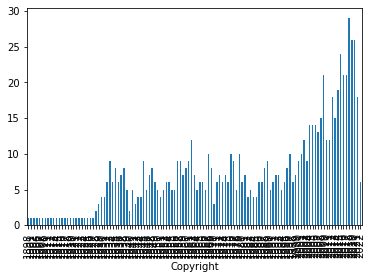

In [65]:
df.explode("Mluveno").groupby("Copyright")["Mluveno"].nunique().plot.bar()

In [66]:
df.explode("Úvodní/závěrečné titulky").groupby("Úvodní/závěrečné titulky")["Originální název"].nunique().nlargest(10)

Úvodní/závěrečné titulky
české          3733
německé         230
anglické        113
slovenské        88
bez titulků      52
francouzské      18
maďarské          4
polské            3
rumunské          2
ruské             2
Name: Originální název, dtype: int64

In [68]:
df.explode("Země původu").groupby("Země původu")["Originální název"].nunique().nlargest(20)

Země původu
Československo                              2948
Česká republika                             1353
Slovensko                                    261
Rakousko-Uhersko                             107
Francie                                       79
Spolková republika Německo                    60
Polsko                                        55
Rakousko                                      39
Německá spolková republika                    25
Velká Británie                                25
Německo                                       22
Spojené státy americké                        20
Svaz sovětských socialistických republik      19
Maďarsko                                      17
Bulharsko                                     14
Itálie                                        14
Německá demokratická republika                13
Slovinsko                                     13
Dánsko                                        11
Rumunsko                                      10
Name: Or

## Hudba

In [70]:
df.explode("Dirigent").groupby("Dirigent")["Film"].nunique().nlargest(40)

Dirigent
Adam Klemens (1779)                   16
Leoš Svárovský (1110)                  9
Mario Klemens (2973)                   9
Jan Chalupecký (5380)                  6
Jan Kučera (21988)                     6
Oskar Rózsa (13685)                    6
Štěpán Koníček (5613)                  6
Mário Klemens (2973)                   5
František Preisler ml. (16987)         4
Giuseppe Becce (129341)                3
Peter Mankovecký (10428)               3
Václav Smetáček (7705)                 3
Anton Popovič (6525)                   2
Antonín Maria Nademlejnský (86257)     2
Jan Valta (76178)                      2
Jaroslav Ježek (1780)                  2
Jiří Chvála (29378)                    2
Josef Dobeš (79567)                    2
Josef Kumok (43206)                    2
Karel Ančerl (7715)                    2
Marek Štryncl (43549)                  2
Marko Ivanović (10363)                 2
Miloš Smatek (68007)                   2
Rudolf Urbanec (2856)                  2
Tadeusz

In [71]:
df.explode("Zpívá").groupby("Zpívá")["Film"].nunique().nlargest(40)

Zpívá
Lucie Bílá (7010)                              7
Lenka Dusilová (1359)                          6
Dan Bárta (5428)                               5
Eva Olmerová (4746)                            5
Karel Gott (3861)                              5
Lucie Vondráčková (1057)                       5
Michael Kocáb (9669)                           5
Eva Pilarová (10373)                           4
Hana Hegerová (13526)                          4
Jiří Korn (8831)                               4
Marta Kubišová (2974)                          4
Viktor Dyk (19188)                             4
Waldemar Matuška (1787)                        4
Bambini di Praga (25483)                       3
Bára Basiková (3166)                           3
Helena Vondráčková (12227)                     3
Jiří Suchý (2270)                              3
Kamil Střihavka (23379)                        3
Karel Štědrý (13743)                           3
Michal David (7475)                            3
Pavel Bobek (2

In [72]:
df[df["Copyright"] > 1989].explode("Použitá hudba").groupby("Použitá hudba")["Film"].nunique().nlargest(40)

Použitá hudba
Bedřich Smetana (2269)                 39
Ludwig van Beethoven (2311)            35
Antonín Dvořák (1570)                  33
Wolfgang Amadeus Mozart (10959)        33
Johann Sebastian Bach (6661)           31
Petr Iljič Čajkovskij (12032)          20
hudebnibanka.cz (38526)                16
Antonio Vivaldi (8435)                 14
Giuseppe Verdi (6404)                  14
Fryderyk Chopin (14644)                12
Georg Friedrich Händel (6811)          11
Richard Wagner (7754)                  11
Felix Mendelssohn-Bartholdy (13092)     9
Gustav Mahler (1569)                    9
Jaroslav Ježek (1780)                   9
Johann Strauss ml. (88126)              9
Johannes Brahms (13091)                 9
Franz Schubert (7752)                   8
Georges Bizet (13269)                   8
Leoš Janáček (12525)                    8
George Gershwin (15202)                 7
Dmitrij Šostakovič (25476)              6
Maurice Ravel (6504)                    6
Zdeněk Fibich (9469)

In [73]:
df.explode("Použitá hudba").groupby("Použitá hudba")["Film"].nunique().nlargest(40)

Použitá hudba
Bedřich Smetana (2269)                   131
Ludwig van Beethoven (2311)               84
Antonín Dvořák (1570)                     74
Wolfgang Amadeus Mozart (10959)           63
Johann Sebastian Bach (6661)              58
Johann Strauss ml. (88126)                44
Georges Bizet (13269)                     42
Petr Iljič Čajkovskij (12032)             37
Felix Mendelssohn-Bartholdy (13092)       33
Giuseppe Verdi (6404)                     29
Fryderyk Chopin (14644)                   27
Richard Wagner (7754)                     21
Jaroslav Ježek (1780)                     18
Antonio Vivaldi (8435)                    16
Josef Suk (12035)                         16
Leoš Janáček (12525)                      16
hudebnibanka.cz (38526)                   16
Julius Fučík (77521)                      14
Franz Schubert (7752)                     13
Georg Friedrich Händel (6811)             13
Jacques Offenbach (126385)                12
Giacomo Puccini (23419)                  

## Předlohy

In [74]:
df.explode("Režie").explode("Předloha").groupby(["Předloha","Režie"])["Film"].nunique().nlargest(50)

Předloha                                                 Režie                       
Ignát Herrmann (128649)                                  Miroslav J. Krňanský (54169)    7
Jan Werich (1287)                                        Vlasta Pospíšilová (4386)       7
Bohumil Hrabal (5005)                                    Jiří Menzel (7887)              6
Josef Skružný (104876)                                   Svatopluk Innemann (33860)      5
Karel Hašler (12006)                                     Josef Kokeisl (55986)           5
Miloš V. Kratochvíl (126188)                             Otakar Vávra (9507)             5
Ondřej Sekora (76485)                                    Hermína Týrlová (4754)          5
Emil Artur Longen (56095)                                Karel Lamač (37847)             4
František Hrubín (65867)                                 Otakar Vávra (9507)             4
Jack London (126119)                                     Zdenek Sirový (4935)            4
Jan 

In [75]:
df.explode("Předloha").groupby("Předloha")["Film"].nunique().nlargest(50)

Předloha
Karel Čapek (14840)                30
Božena Němcová (22832)             26
Jaroslav Hašek (15268)             21
Bohumil Hrabal (5005)              16
Alois Jirásek (34347)              14
Ignát Herrmann (128649)            14
Jan Werich (1287)                  14
Jan Drda (32933)                   12
Karel Jaromír Erben (4043)         12
Jiří Marek (4851)                  10
Emil Artur Longen (56095)           9
Josef Kajetán Tyl (83349)           9
Josef Skružný (104876)              9
Michal Viewegh (8713)               9
Anton Pavlovič Čechov (11893)       8
Josef Škvorecký (7937)              8
Karel Štorkán (31946)               8
Vladimír Páral (18666)              8
Václav Řezáč (83280)                8
Arnošt Lustig (11300)               7
František Langer (126315)           7
Ivan Olbracht (12935)               7
Jan Neruda (82056)                  7
Vladislav Vančura (9397)            7
Bohumil Říha (126064)               6
Egon Erwin Kisch (126113)           6
F. 

In [76]:
df.explode("Původní filmový námět").groupby("Původní filmový námět")["Film"].nunique().nlargest(50)

Původní filmový námět
Ota Hofman (126062)             47
Jan Procházka (34081)           28
Hermína Týrlová (4754)          23
František Vlček (87095)         22
Miloš Macourek (1045)           22
Jindřich Polák (7891)           21
Vladimír Kalina (4895)          21
Karel Steklý (35894)            18
Otakar Vávra (9507)             18
Petr Schulhoff (7896)           17
Vratislav Blažek (126137)       17
Věra Chytilová (1555)           17
Zdeněk Troška (3874)            17
Josef Neuberg (127301)          16
Jiří Brdečka (18026)            15
Jan S. Kolár (51548)            14
Václav Wasserman (37326)        14
Zdeněk Svěrák (1892)            14
Bořivoj Zeman (8886)            13
Jiří Trnka (28391)              13
Pavel Juráček (8127)            13
Vladimír Slavínský (31967)      13
Elmar Klos (4742)               12
Jaroslav Dietl (14407)          12
Jaroslav Papoušek (4930)        12
Jiří Karásek (13679)            12
Karel Vachek (565)              12
Karel Štorkán (31946)           1

In [77]:
df.explode("Postavy").groupby("Film")["Postavy"].nunique().nlargest(10)

Film
Dny zrady (396979)                   212
Osvobození Prahy (397108)            169
Putování Jana Amose (397429)         168
Lásky mezi kapkami deště (397232)    159
Vítězný lid (397143)                 157
Zelená vlna (397382)                 133
Anna proletářka (396154)             111
Hvězda padá vzhůru (397037)          105
Dvacátý devátý (397039)              103
Prodavač humoru (397452)             100
Name: Postavy, dtype: int64

In [78]:
df.explode("Hrají").groupby("Film")["Hrají"].nunique().nlargest(10)

Film
Osvobození Prahy (397108)            176
Putování Jana Amose (397429)         152
Mazaný Filip (20319)                 143
Bastardi (165508)                    139
Dny zrady (396979)                   138
Dvacátý devátý (397039)              137
7 dní hříchů (103358)                136
Restart (38599)                      136
Vítězný lid (397143)                 133
Lásky mezi kapkami deště (397232)    132
Name: Hrají, dtype: int64

In [80]:
df.explode("Hrají").groupby("Hrají")["Film"].nunique().nlargest(50)

Hrají
Jan W. Speerger (55928)        281
Theodor Pištěk (37366)         254
Eman Fiala (64088)             214
Jaroslav Marvan (9550)         208
František Filipovský (4735)    181
Alois Dvorský (127491)         169
Milka Balek-Brodská (28799)    166
Oldřich Velen (12725)          166
Josef Kemr (4897)              161
Jaroslav Tomsa (2576)          152
Václav Trégl (35224)           151
Vladimír Hlavatý (34999)       146
Josef Hlinomaz (26212)         139
Karel Hovorka (76534)          135
Vladimír Řepa (127334)         134
Jiří Lír (4926)                132
F. X. Mlejnek (128287)         130
Vladimír Menšík (126036)       130
Karel Augusta (5058)           128
František Kreuzmann (75624)    127
Vladimír Navrátil (12670)      126
Lubomír Kostelka (841)         123
Bohuš Záhorský (53346)         122
Mirko Musil (33555)            122
Jindřich Plachta (5829)        120
Ota Motyčka (81341)            120
Rudolf Hrušínský (4842)        117
Jan Kuželka (1445)             116
Josef Somr (10